In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
df = pd.read_csv(r"D:\download\9e6aa-delivery-time\Delivery time\deliverytime.txt")

In [5]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [6]:
df.info

<bound method DataFrame.info of          ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       

In [7]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

Calculating Distance Between Two Latitudes and Longitudes

In [8]:
R=6371


In [9]:
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

In [10]:
def distcalculate(lat1,lon1,lat2,lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))* np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [11]:
df['distance'] =np.nan

In [12]:
for i in range(len(df)):
    df.loc[i,'distance'] = distcalculate(df.loc[i,'Restaurant_latitude'],
                                        df.loc[i,'Restaurant_longitude'],
                                        df.loc[i,'Delivery_location_latitude'],
                                        df.loc[i,'Delivery_location_latitude'])

In [13]:
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

In [14]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Data Exploration

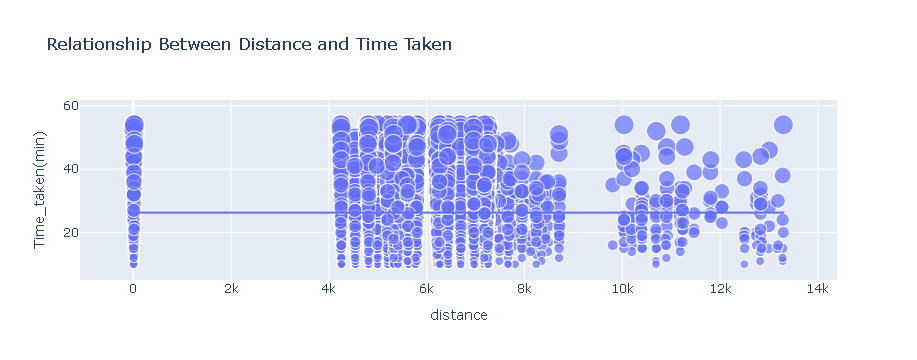

In [15]:
figure = px.scatter(data_frame = df, 
                    x="distance",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    trendline="ols", 
                    title = "Relationship Between Distance and Time Taken")
figure.show()

There is a consistent relationship between the time taken and the distance travelled to deliver the food. It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

In [16]:
figure = px.scatter(data_frame = df, 
                    x="Delivery_person_Age",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between Time Taken and Age")
figure.show()

There is a linear relationship between the time taken to deliver the food and the age of the delivery partner. It means young delivery partners take less time to deliver the food compared to the elder partners.

In [17]:
figure = px.scatter(data_frame = df, 
                    x="Delivery_person_Ratings",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between Time Taken and Ratings")
figure.show()

There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

In [18]:
fig = px.box(df, 
             x="Type_of_vehicle",
             y="Time_taken(min)", 
             color="Type_of_order")
fig.show()

So there is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

So the features that contribute most to the food delivery time based on our analysis are:
age of the delivery partner,

ratings of the delivery partner,

distance between the restaurant and the delivery location

Food Delivery Time Prediction Model

Machine Learning model using an LSTM neural network model for the task of food delivery time prediction:

In [19]:
from sklearn.model_selection import train_test_split
x=np.array(df[["Delivery_person_Age",
              "Delivery_person_Ratings",
              "distance"]])
y=np.array(df[["Time_taken(min)"]])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

C:\Users\vasanth\Downloads\Telegram Desktop\sql\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1,epochs=10)

Epoch 1/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 354s 8ms/step - loss: 68.0745
Epoch 2/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 309s 8ms/step - loss: 68.4646
Epoch 3/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 314s 8ms/step - loss: 67.9474
Epoch 4/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 323s 8ms/step - loss: 67.4035
Epoch 5/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 320s 8ms/step - loss: 67.8984
Epoch 6/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 16429s 400ms/step - loss: 67.9247
Epoch 7/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 280s 7ms/step - loss: 67.7471
Epoch 8/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 325s 8ms/step - loss: 69.2710
Epoch 9/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 409s 10ms/step - loss: 67.8887
Epoch 10/10
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 426s 10ms/step - loss: 66.6883


In [23]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Parnter"))
b = float(input("Ratings of Previous Deliveries:"))
c = int(input("Total Distance:"))

features = np.array([[a,b,c]])
print("Predicted Delivery Time in Minutes =", model.predict(features))

Food Delivery Time Prediction


Age of Delivery Parnter 25
Ratings of Previous Deliveries: 4.25
Total Distance: 400


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Delivery Time in Minutes = [[30.864094]]


Summary

To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.